# Ghazaleh Zehtab
# HW6, Question3

In [338]:
import jenkspy

import pandas as pd
import statsmodels.api as sm
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.hierarchy import fcluster
import matplotlib.cm as cm
import plot_utils
import seaborn as sns
import statistics
from sklearn import tree, metrics, preprocessing
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

## a

In [339]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [340]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [341]:
print(cancer.target_names)

['malignant' 'benign']


In [342]:
df = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## b

In [343]:
df['Cancer']=0
df['Cancer']=cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## c

In [344]:
df[df.isna().any(axis=1)]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer


In [345]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,index=df.index, columns=df.columns)
df['Cancer'] = df['Cancer'].astype('int')
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,0
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,0
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,0
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,0


## d

In [346]:
y=df['Cancer']
x=df.drop(columns='Cancer')
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
x_train

c:\_uni\term8\datamining\hws\codes\venv\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
432,0.624686,0.332432,0.622003,0.469353,0.547711,0.397276,0.499766,0.625746,0.335354,0.222620,...,0.501601,0.347814,0.476070,0.317981,0.629532,0.258957,0.423962,0.746735,0.289178,0.168634
346,0.240381,0.310788,0.227144,0.128017,0.281936,0.118275,0.017596,0.042187,0.250000,0.221567,...,0.203131,0.400853,0.179939,0.092755,0.381232,0.104695,0.035990,0.175017,0.259215,0.169159
279,0.325098,0.184985,0.312349,0.188293,0.383949,0.176370,0.104944,0.184443,0.530303,0.180497,...,0.250800,0.259062,0.238857,0.119151,0.312554,0.140786,0.116294,0.343402,0.274000,0.092352
180,0.957878,0.411228,0.955774,0.893531,0.512503,0.527636,0.672680,0.933400,0.373737,0.163016,...,0.896122,0.555171,0.848598,0.744888,0.502080,0.364904,0.426518,0.923711,0.254485,0.169094
521,0.835297,0.402097,0.841061,0.720042,0.454726,0.586528,0.541237,0.731113,0.470202,0.367102,...,0.782284,0.397388,0.773395,0.603814,0.416232,0.379845,0.372045,0.850515,0.313818,0.273318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,0.581618,0.566791,0.581231,0.432025,0.373567,0.467824,0.388238,0.377386,0.400505,0.266428,...,0.577019,0.503198,0.552767,0.400069,0.526514,0.612888,0.486502,0.613402,0.415336,0.375574
263,0.408396,0.327021,0.388432,0.260912,0.232644,0.112815,0.098618,0.141501,0.245960,0.094145,...,0.355034,0.523721,0.326162,0.197454,0.245856,0.148839,0.180511,0.294433,0.220382,0.086908
189,0.251739,0.209334,0.242139,0.135822,0.254311,0.163027,0.090066,0.082207,0.306566,0.100674,...,0.192814,0.201759,0.180487,0.088847,0.253781,0.133607,0.113658,0.165464,0.180761,0.052604
146,0.228075,0.232330,0.243245,0.122375,0.509795,0.461996,0.388707,0.368539,0.817172,0.500211,...,0.206688,0.382729,0.206783,0.099907,0.444628,0.370531,0.359744,0.640893,0.829687,0.314574


## e

In [347]:

mlp = MLPClassifier(max_iter=1000, alpha=1,hidden_layer_sizes = (20,100), random_state=42)
mlp.fit(x_train,y_train)
predicted=mlp.predict(x_test)
predicted

c:\_uni\term8\datamining\hws\codes\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1])

## f

In [348]:
print('acc for training data: {:.3f}'.format(mlp.score(x_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(x_test, y_test)))

acc for training data: 0.978
acc for test data: 0.991


In [349]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [350]:
pca.explained_variance_ratio_

array([0.53097689, 0.1728349 ])

In [351]:
np.cumsum(pca.explained_variance_ratio_)

array([0.53097689, 0.70381179])

In [352]:
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2']) 
principalDf.head()

,principal component 1,principal component 2
0,1.387021,0.426895
1,0.462308,-0.556947
2,0.954621,-0.109701
3,1.000816,1.525089
4,0.626828,-0.302471


In [353]:
finalDf=principalDf
finalDf['Cancer']=0
finalDf['Cancer']=df['Cancer']
finalDf.head(30)

,principal component 1,principal component 2,Cancer
0,1.387021,0.426895,0
1,0.462308,-0.556947,0
2,0.954621,-0.109701,0
3,1.000816,1.525089,0
4,0.626828,-0.302471,0
5,0.383541,0.633027,0
6,0.470176,-0.343860,0
7,0.282361,0.372011,0
8,0.551512,0.588617,0
9,0.949182,1.156718,0


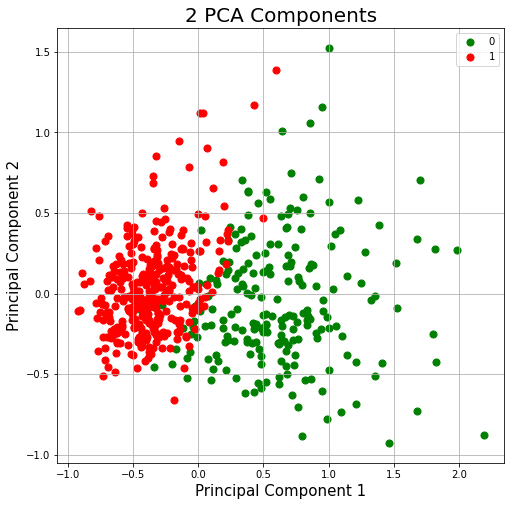

In [354]:
fig=plt.figure(figsize=(8,8))  
ax=fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1',fontsize = 15)  
ax.set_ylabel('Principal Component 2',fontsize = 15)  
ax.set_title('2 PCA Components',fontsize=20)  
Cancer=[0,1]
Cancer_1=['0','1'] 
colors=['g','r']  
for Cancer,color in zip(Cancer,colors):    
     indicesToKeep = finalDf['Cancer'] == Cancer
     ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],
              finalDf.loc[indicesToKeep,'principal component 2'],
             c=color,
             s=50)
ax.legend(Cancer_1)  
ax.grid()

## h

In [355]:
y=finalDf['Cancer']
x=finalDf.drop(columns='Cancer')
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
mlp = MLPClassifier(max_iter=1000, alpha=1,hidden_layer_sizes = (20,100), random_state=42)
mlp.fit(x_train,y_train)
print('acc for training data: {:.3f}'.format(mlp.score(x_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(x_test, y_test)))

acc for training data: 0.947
acc for test data: 0.965
